1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

Eigenvalue: [4.13199830e+02 2.01195578e-14 1.05596935e+01]
Normalised eigenvector: [[-0.43754109 -0.81649658  0.37668439]
 [-0.02380119 -0.40824829 -0.91256059]
 [-0.89888336  0.40824829 -0.15919181]]
U
: [[-0.43754109  0.37668439 -0.81649658]
 [-0.02380119 -0.91256059 -0.40824829]
 [-0.89888336 -0.15919181  0.40824829]]
Spectrum (D)
: [4.13199830e+02 1.05596935e+01 1.54325033e-14]
V
: [[-0.43754109 -0.02380119 -0.89888336]
 [ 0.37668439 -0.91256059 -0.15919181]
 [-0.81649658 -0.40824829  0.40824829]]
**************************************************
 main component: 97.50809293673686
 two features: 1.0
**************************************************


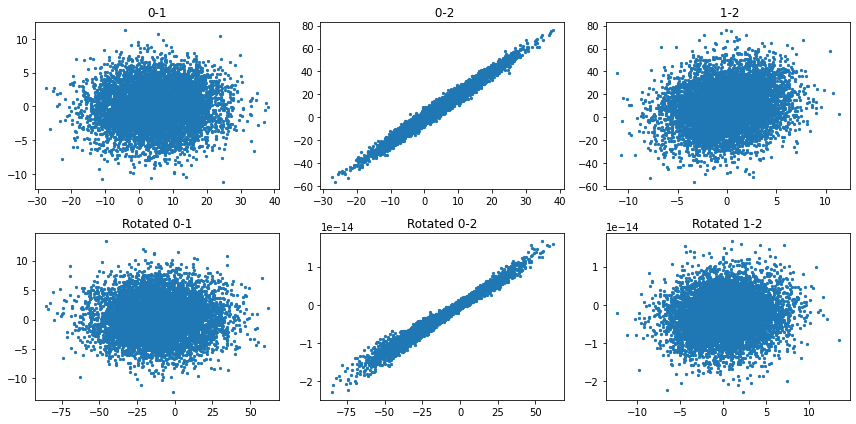

In [ ]:
#librariess
import numpy as np
import pandas as pd
from scipy import linalg as la
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
   #include random variables
N = 7100
mu = 5
sigma = 9

x1 = np.random.normal(loc = mu, scale = sigma, size = N)

mu2 = 0
sigma2 = 3
x2 = np.random.normal(loc=mu2, scale = sigma2, size = N)

x3 = 2*x1+x2
X = [x1, x2, x3]
##reducing dimension useng pca
C = np.cov(X)
l,V = np.linalg.eig(C)

print("Eigenvalue:", l)
print("Normalised eigenvector:", V)

U, spectrum, V = la.svd(C)
print("U\n:", U)
print("Spectrum (D)\n:", spectrum)
print("V\n:", V)
print("**************************************************")
main_component = spectrum[0]/spectrum.sum()
print(" main component:", main_component*100)
per_tf = (spectrum[0]+spectrum[1]) /spectrum.sum()
print(" two features:", per_tf)
print("**************************************************")
# plotting new coordinates
Xp = np.dot(V, X)
fig, axes = plt.subplots(nrows=2, ncols=3,
                               figsize=(12, 6))

#print(axes)
[[ax01, ax02, ax03],[ax11, ax12, ax13]] = axes

ax01.scatter(X[0], X[1], s= 5)
ax01.set_title('0-1')
ax02.scatter(X[0], X[2], s= 5)
ax02.set_title(' 0-2')
ax03.scatter(X[1], X[2], s= 5)
ax03.set_title(' 1-2')

ax11.scatter(Xp[0], Xp[1], s= 5)
ax11.set_title('Rotated 0-1')
ax12.scatter(Xp[0], Xp[2], s= 5)
ax12.set_title('Rotated 0-2')
ax13.scatter(Xp[1], Xp[2], s= 5)
ax13.set_title('Rotated 1-2')

plt.tight_layout()
plt.show()

The percentage are: 88%, 1.0% They make sense because the first eigenvalue is the greatest, and the second one is very close to 0.

2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [ ]:
# write variables
noises = np.random.normal(loc=0, scale=1/50, size=(3, N, 10))
x_noise = x + np.sum(noises, axis = 2)

# use pca reduce
cov1 = np.cov(x_noise)
l1, V1 = np.linalg.eig(cov1)
l1 = np.real_if_close(l1)
U1, S1, Vt1 = la.svd(x_noise)
l_svd1 = S1**2/(N-1)
V_svd1 = U1

print('With Eigen-decomposition:\nEigenvalues:\n',l1)
print('Eigenvectors:\n', V1)
print('\nWith SVD:\nEigenvalues:\n',l_svd1)
print('Eigenvectors:\n', V_svd1)

Lambda = np.diag(l1)
print('\nPercentage variability gained by the three components:\n',
       (l1/Lambda.trace())*100)

print('\nPercentage variability of the reduced system considering only the principal component 1 and 3:\n', (np.sum(l1[[0,2]])/Lambda.trace())*100)

#  new coordinates
x_new1 = np.dot(V1.T,x_noise)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axs[0,0].scatter(x_noise[0,:],x_noise[1,:], alpha=0.5, label='data (0,1)')
axs[0,0].legend()
axs[0,1].scatter(x_noise[0,:],x_noise[2,:], alpha=0.5, label='data (0,2)')
axs[0,1].legend()
axs[0,2].scatter(x_noise[1,:],x_noise[2,:], alpha=0.5, label='data (1,2)')
axs[0,2].legend()
axs[1,0].scatter(x_new1[0,:],x_new1[1,:], alpha=0.5, label='PC (0,1)')
#---------------------
axs[1,0].legend()
axs[1,1].scatter(x_new1[0,:],x_new1[2,:], alpha=0.5, label='PC (0,2)')
axs[1,1].legend()
axs[1,2].scatter(x_new1[1,:],x_new1[2,:], alpha=0.5, label='PC (1,2)')
#----------------------------
axs[1,2].legend()

plt.show()

NameError: ignored

Adding the uncorrelated commotion, it's possible to see that in the plots PC(0,1) and PC(1,2) in the new arrangement of directions there is some data allowed continuously head part. Truth be told the subsequent eigenvalue is more prominent that in ex01 and furthermore the rate fluctuation acquired continuously part is more noteworthy than previously. Be that as it may, a 2d framework it doesn't cause a critical loss of data.

3\. **Optional**: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset 
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

--2022-01-21 18:27:35--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1477391 (1.4M) [application/x-httpd-php]
Saving to: ‘data/magic04.data’

magic04.data        100%[===================>]   1.41M  3.36MB/s    in 0.4s    

2022-01-21 18:27:36 (3.36 MB/s) - ‘data/magic04.data’ saved [1477391/1477391]

--2022-01-21 18:27:36--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5400 (5.3K) [application/x-httpd-php]
Saving to: ‘data/magic04.names’

magic04.names       100%[===================>]   5.27K  --.-K

In [ ]:
df = pd.read_csv('data/magic04.data', names=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','fCategory'])
df1 = df.iloc[0:len(df),0:-1]
df1

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620
...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166



With SVD:
Eigenvalues:
 [4.77409403e+04 4.19856128e+03 2.08452610e+03 1.33861305e+03
 8.21439948e+02 4.33666972e+02 1.17362222e+02 5.64110552e-01
 3.48553824e-02 4.22636373e-04]
**************************************

With Eigen-decomposition:
Eigenvalues:
 [6.57979140e+03+0.j 3.85387048e+03+0.j 2.01638313e+03+0.j
 1.32675968e+03+0.j 6.10187259e+02+0.j 4.33599171e+02+0.j
 1.17330074e+02+0.j 8.63965822e-02+0.j 1.07363851e-02+0.j
 3.85322859e-04+0.j]
**************************************

Percentage variability gained by the components:
 [8.41461946e+01 7.40020938e+00 3.67409895e+00 2.35938365e+00
 1.44783587e+00 7.64363357e-01 2.06857769e-01 9.94277783e-04
 6.14346465e-05 7.44921283e-07]
**************************************


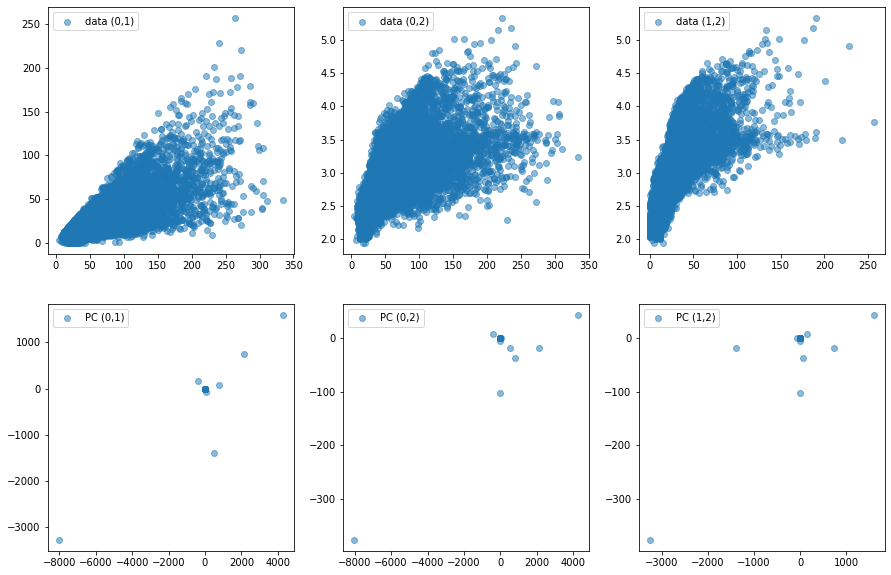

In [ ]:

U2, S2, Vt2 = la.svd(df1)
l_svd2 = S2**2/(len(df1)-1)
V_svd2 = U2
print('\nWith SVD:\nEigenvalues:\n',l_svd2)
#                          eigen decomposotion
print("**************************************")
l2, V2 = la.eig(np.cov(df1,rowvar=False))
print('\nWith Eigen-decomposition:\nEigenvalues:\n',l2)
print("**************************************")
#                           # percentage variability 
Lambda = np.diag(l_svd2)
print('\nPercentage variability gained by the components:\n',
       (l_svd2/Lambda.trace())*100)
print("**************************************")
          #display plots
pcaData = np.dot(U2.T, df1)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axs[0,0].scatter(df1.values[:,0], df1.values[:,1], alpha=0.5, label='data (0,1)')
axs[0,0].legend()
axs[0,1].scatter(df1.values[:,0], df1.values[:,2], alpha=0.5,label='data (0,2)')
axs[0,1].legend()
axs[0,2].scatter(df1.values[:,1], df1.values[:,2], alpha=0.5,label='data (1,2)')
axs[0,2].legend()
axs[1,0].scatter(pcaData[:,0], pcaData[:,1], alpha=0.5, label='PC (0,1)')
axs[1,0].legend()
axs[1,1].scatter(pcaData[:,0], pcaData[:,2], alpha=0.5,label='PC (0,2)')
axs[1,1].legend()
axs[1,2].scatter(pcaData[:,1], pcaData[:,2], alpha=0.5,label='PC (1,2)')
axs[1,2].legend()
plt.show()